Deep Learning for Time Series Forecasting

In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotibline

C:\Users\rpark.CVC\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
ERROR:root:Line magic function `%matplotibline` not found.


In [2]:
# y = mx + b +noise
%matplotlib inline

In [3]:
m=2
b=3
x=np.linspace(0,50,100)

In [4]:
np.random.seed(101)
noise = np.random.normal(loc=0,scale=4,size=len(x))

In [5]:
y = 2*x+b+noise

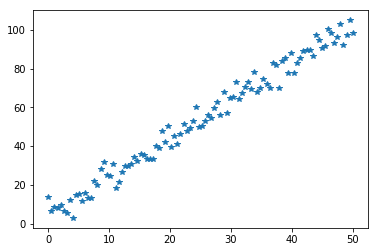

In [6]:
plt.plot(x,y,'*')

In [7]:
from keras.models import Sequential

In [8]:
from keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(units=4,input_dim=1,activation='relu'))

model.add(Dense(4,activation='relu'))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x,y,epochs=200)

Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Epoch 1/200
100/100 [==============================] - 0s 2ms/step - loss: 3628.2798
Epoch 2/200
100/100 [==============================] - 0s 65us/step - loss: 3621.1557
Epoch 3/200
100/100 [==============================] - 0s 80us/step - loss: 3613.3186
Epoch 4/200
100/100 [==============================] - 0s 70us/step - loss: 3605.1815
Epoch 5/200
100/100 [==============================] - 0s 70us/step - loss: 3597.2450
Epoch 6/200
100/100 [==============================] - 0s 60us/step - loss: 3588.2566
Epoch 7/200
100/100 [==============================] - 0s 75us/step - loss: 3579.2989
Epoch 8/200
100/100 [==============================] - 0s 55us/step - loss: 3570.4000
Epoch 9/200
100/100 [==============================] - 0s 115us/step - loss: 3561.1205
Epoch 10/200
100/100 [==============================] - 0s 85us/step - loss: 3551.3290
Epoch 11/200
100/100 [==============================] - 0s 75us/step - loss: 3541.6582
Epoch 12/200
100/100 [==============================

100/100 [==============================] - 0s 70us/step - loss: 1525.7417
Epoch 95/200
100/100 [==============================] - 0s 90us/step - loss: 1493.6641
Epoch 96/200
100/100 [==============================] - 0s 60us/step - loss: 1459.2820
Epoch 97/200
100/100 [==============================] - 0s 90us/step - loss: 1427.2997
Epoch 98/200
100/100 [==============================] - 0s 95us/step - loss: 1395.5718
Epoch 99/200
100/100 [==============================] - 0s 90us/step - loss: 1363.2106
Epoch 100/200
100/100 [==============================] - 0s 95us/step - loss: 1329.9276
Epoch 101/200
100/100 [==============================] - 0s 65us/step - loss: 1297.2529
Epoch 102/200
100/100 [==============================] - 0s 95us/step - loss: 1266.4281
Epoch 103/200
100/100 [==============================] - 0s 85us/step - loss: 1233.9971
Epoch 104/200
100/100 [==============================] - 0s 65us/step - loss: 1203.0152
Epoch 105/200
100/100 [============================

100/100 [==============================] - 0s 75us/step - loss: 30.4296
Epoch 189/200
100/100 [==============================] - 0s 70us/step - loss: 29.4813
Epoch 190/200
100/100 [==============================] - 0s 70us/step - loss: 28.5548
Epoch 191/200
100/100 [==============================] - 0s 75us/step - loss: 27.7211
Epoch 192/200
100/100 [==============================] - 0s 75us/step - loss: 26.9310
Epoch 193/200
100/100 [==============================] - 0s 65us/step - loss: 26.1220
Epoch 194/200
100/100 [==============================] - 0s 70us/step - loss: 25.3840
Epoch 195/200
100/100 [==============================] - 0s 70us/step - loss: 24.7075
Epoch 196/200
100/100 [==============================] - 0s 60us/step - loss: 24.1154
Epoch 197/200
100/100 [==============================] - 0s 75us/step - loss: 23.5791
Epoch 198/200
100/100 [==============================] - 0s 65us/step - loss: 23.0784
Epoch 199/200
100/100 [==============================] - 0s 75us/ste

In [12]:
#model.history.history['loss']

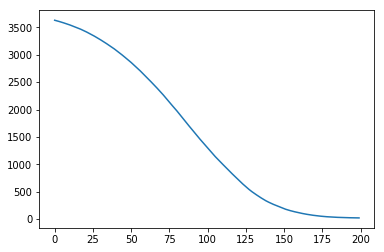

In [13]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss)

In [14]:
x_for_predictions = np.linspace(0,50,100)
y_pred = model.predict(x_for_predictions)

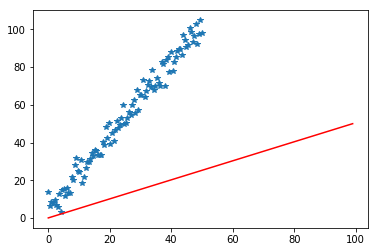

In [15]:
plt.plot(x,y,'*')
plt.plot(x_for_predictions,'r')

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mean_squared_error(y,y_pred)

22.01765507524781

Recurrent Neural Networks Theory

In [18]:
btc = pd.read_html('https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20190523')

In [19]:
btc = btc[0]

In [20]:
dates = btc['Date']

In [21]:
dates = pd.to_datetime(dates)

In [22]:
btc.drop(labels='Date',axis=1,inplace=True)

In [23]:
btc['Date'] = dates

In [24]:
btc.set_index(keys='Date',inplace=True)

In [25]:
#btc = btc.sort_index(ascending=True)

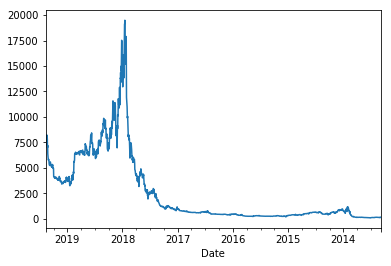

In [26]:
btc['Close**'].plot()

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
close = seasonal_decompose(btc['Close**'])

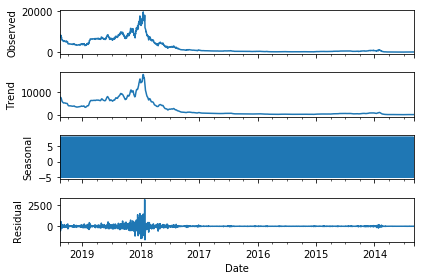

In [29]:
close.plot();

In [30]:
close_ = btc['Close**']

In [31]:
btc = pd.DataFrame(data=close_)

In [32]:
btc = btc.resample('MS').mean()

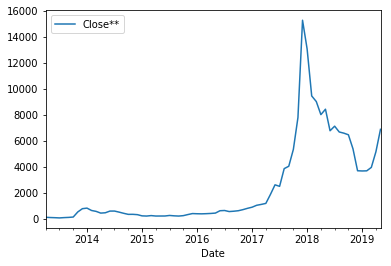

In [33]:
btc.plot()

In [34]:
len(btc)

74

In [35]:
74*.8

59.2

In [36]:
train = btc.iloc[:len(btc)-60]
test = btc.iloc[len(btc)-60:]

In [37]:
# scale the data
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
scaler.fit(train) # finds the max value

MinMaxScaler(copy=True, feature_range=(0, 1))

In [40]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [41]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [42]:
scaled_train[:5]

array([[0.06466841],
       [0.03911641],
       [0.0228872 ],
       [0.        ],
       [0.03103923]])

In [72]:
n_input = 12
n_features = 1

generator  = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [73]:
len(scaled_train)

14

In [74]:
len(generator)

2

In [75]:
X,y = generator[0]

In [76]:
X

array([[[0.06466841],
        [0.03911641],
        [0.0228872 ],
        [0.        ],
        [0.03103923],
        [0.05247673],
        [0.08996102],
        [0.61023641],
        [0.94243075],
        [1.        ],
        [0.75778055],
        [0.66567237]]])

In [77]:
y

array([[0.49206846]])

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [78]:
n_input = 12
# how many columns equals below
n_features = 1

train_generator  = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [79]:
model = Sequential()

model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit_generator(train_generator,epochs=25)

Epoch 1/25
2/2 [==============================] - 1s 485ms/step - loss: 0.2094
Epoch 2/25
2/2 [==============================] - 0s 28ms/step - loss: 0.1720
Epoch 3/25
2/2 [==============================] - 0s 49ms/step - loss: 0.1316
Epoch 4/25
2/2 [==============================] - 0s 52ms/step - loss: 0.0953
Epoch 5/25
2/2 [==============================] - 0s 49ms/step - loss: 0.0634
Epoch 6/25
2/2 [==============================] - 0s 52ms/step - loss: 0.0342
Epoch 7/25
2/2 [==============================] - 0s 50ms/step - loss: 0.0109
Epoch 8/25
2/2 [==============================] - 0s 54ms/step - loss: 0.0010
Epoch 9/25
2/2 [==============================] - 0s 49ms/step - loss: 0.0113
Epoch 10/25
2/2 [==============================] - 0s 61ms/step - loss: 0.0177
Epoch 11/25
2/2 [==============================] - 0s 48ms/step - loss: 0.0105
Epoch 12/25
2/2 [==============================] - 0s 56ms/step - loss: 0.0029
Epoch 13/25
2/2 [==============================] - 0s 52ms/s

In [82]:
model.history.history.keys()

dict_keys(['loss'])

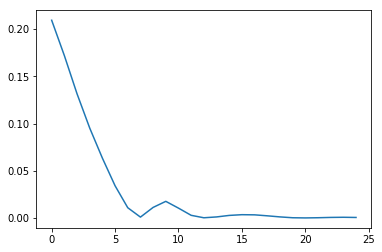

In [83]:
myloss = model.history.history['loss']
plt.plot(range(len(myloss)),myloss)

In [84]:
first_eval_batch = scaled_train[-12:]

In [85]:
first_eval_batch

array([[0.0228872 ],
       [0.        ],
       [0.03103923],
       [0.05247673],
       [0.08996102],
       [0.61023641],
       [0.94243075],
       [1.        ],
       [0.75778055],
       [0.66567237],
       [0.49206846],
       [0.52562305]])

In [86]:
first_eval = first_eval_batch.reshape((1,n_input,n_features))

In [87]:
model.predict(first_eval)

array([[0.55772734]], dtype=float32)

Forecast using Trained RNN model

In [88]:
#hold predictions
test_predictions = []

#last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]
# reshape this to the format RNN wants (same format as TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))

# how far into the future will be forecasted
# len(test) --> time units into the future
for i in range(12):
    # one time step ahead of historical data
    current_pred = model.predict(current_batch)[0]
    
    #store prediction
    test_predictions.append(current_pred)
    # update current batch to include the prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [89]:
my_first_pred = model.predict(current_batch)[0]

In [90]:
my_first_pred

array([0.6511137], dtype=float32)

In [91]:
current_batch.shape

(1, 12, 1)

In [92]:
np.append(current_batch[:,1:,:],[[my_first_pred]],axis=1)

array([[[0.57893133],
        [0.60049325],
        [0.62131304],
        [0.64188874],
        [0.66205245],
        [0.66504705],
        [0.65444458],
        [0.64183295],
        [0.63858205],
        [0.63841975],
        [0.64535749],
        [0.65111369]]])

In [93]:
#hold predictions
test_predictions = []

#last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]
# reshape this to the format RNN wants (same format as TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))

# how far into the future will be forecasted
# len(test) --> time units into the future --> change test to number of units to test into future
for i in range(12):
    # one time step ahead of historical data
    current_pred = model.predict(current_batch)[0]
    
    #store prediction
    test_predictions.append(current_pred)
    # update current batch to include the prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [94]:
test_predictions

[array([0.55772734], dtype=float32),
 array([0.57893133], dtype=float32),
 array([0.60049325], dtype=float32),
 array([0.62131304], dtype=float32),
 array([0.64188874], dtype=float32),
 array([0.66205245], dtype=float32),
 array([0.66504705], dtype=float32),
 array([0.6544446], dtype=float32),
 array([0.64183295], dtype=float32),
 array([0.63858205], dtype=float32),
 array([0.63841975], dtype=float32),
 array([0.6453575], dtype=float32)]

In [95]:
true_predictions = scaler.inverse_transform(test_predictions)

In [96]:
true_predictions

array([[510.84688384],
       [526.82740444],
       [543.07767809],
       [558.76863531],
       [574.27563937],
       [589.47214668],
       [591.72904303],
       [583.73842336],
       [574.23359294],
       [571.78353454],
       [571.66121355],
       [576.88988551]])

In [71]:
#model.save('first_btc_prediction.h5'
#see lesson 85 for complete instructions on how to save and load model

len(btc['Close**'])

74

In [97]:
btc[:-12]

,Close**
Date,
2013-04-01,139.250000
2013-05-01,119.992581
2013-06-01,107.761333
2013-07-01,90.512258
2013-08-01,113.905161
2013-09-01,130.061667
2013-10-01,158.311935
2013-11-01,550.420667
2013-12-01,800.780968
